In [198]:
import numpy as np
import numpy.linalg as nplin
from numpy.linalg import inv

from scipy.stats import multivariate_normal
import scipy.linalg as scln
from scipy.spatial import distance

import statistics

import matplotlib.pyplot as plt
import plotly.graph_objects as go

from collections import defaultdict

In [199]:
def gaussian(sample,mean,cov):
    z = np.random.normal(size=(sample, cov.shape[0]))
    return (z.dot(scln.cholesky(cov))+mean)

In [200]:
def randomSampling(priorLength,probability,size):
    varList = np.random.choice(priorLength,size,p = probability)
    cnt = np.zeros([1,priorLength],dtype = int)
    for element in varList:
        cnt[0,element] = cnt[0,element] + 1
    return(cnt)

In [201]:
def generatePlot_misclassificationClass(c12,c13,x1,colour,order,label1,marker1):    
    labelled12 = []
    labelled13 = []
    Y1 = []
    
    for index in range(0,c12.shape[1]):
        if c12[0,index]<=0:
            labelled12.append(index)
        if c13[0,index]<=0:
            labelled13.append(index)
        if c12[0,index]>0 and c13[0,index]>0:
            Y1.append(index)
            
    XX1 = np.array([x1[:,index] for index in Y1])
    X12 = np.array([x1[:,index] for index in labelled12])
    X13 = np.array([x1[:,index] for index in labelled13])
    X123 = np.array([x1[:,index] for index in labelled13 if index in labelled12])
    overlap = X123.shape[0]
    
    if Y1:
        plt.scatter(XX1[:,0],XX1[:,1],color = colour[0],label = label1[0],marker = marker1[0])
    if labelled12:
        plt.scatter(X12[:,0],X12[:,1],color = colour[1],label = label1[1],marker = marker1[1])
    if labelled13:
        plt.scatter(X13[:,0],X13[:,1],color = colour[2],label = label1[2],marker = marker1[2])
    if overlap:
        plt.scatter(X123[:,0],X123[:,1],color = colour[3],label = label1[3],marker = marker1[3])
        
    plt.legend()
    
    res = [len(Y1),len(labelled12),len(labelled13)]
    return([res[order[0]-1],res[order[1]-1],res[order[2]-1],overlap,res[0]+res[1]+res[2]-overlap])

In [202]:
mu_1 = np.array([-1,0])
cov_1 = np.matrix([[1,-0.4],[-0.4,0.5]])

mu_2 = np.array([1,0])
cov_2 = np.matrix([[0.5,0],[0,0.2]])

mu_3 = np.array([0,1])
cov_3 = np.matrix([[0.1,0],[0,0.1]])

prior = [0.15,0.35,0.5]
samplesize = 10000
class_size = randomSampling(len(prior),prior,samplesize)



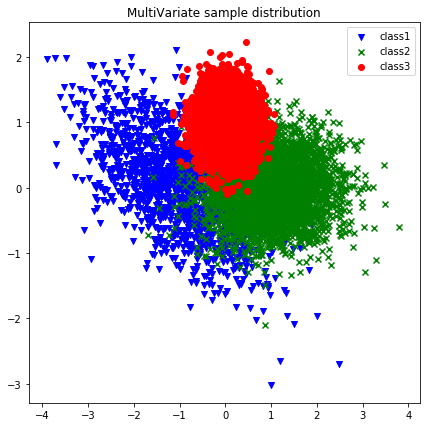

In [203]:
x1 = gaussian(class_size[0,0],mu_1, cov_1).T
x2 = gaussian(class_size[0,1],mu_2, cov_2).T
x3 = gaussian(class_size[0,2],mu_3, cov_3).T

plt.figure(figsize=(7,7))
plt.scatter(x1[0,:],x1[1,:], color = "blue",label = 'class1',marker = "v")
plt.scatter(x2[0,:],x2[1,:], color = "green",label = 'class2',marker = "x")
plt.scatter(x3[0,:],x3[1,:], color = "red",label = 'class3',marker = "o")
plt.title('MultiVariate sample distribution')
plt.legend()
plt.show()


In [204]:
mu_1 = mu_1.reshape(2,1)
covinv1 = cov_1.I

mu_2 = mu_2.reshape(2,1)
covinv2 = cov_2.I

mu_3 = mu_3.reshape(2,1)
covinv3 = cov_3.I

w1 = (covinv1@mu_1)
W1 = -(1/2)*(covinv1)
w01 = (mu_1.T@(covinv1@mu_1))*(-1/2)+np.log(prior[0])-(1/2)*np.log(nplin.det(cov_1))

gx11 = (x1.T@(W1@x1))+(w1.T@x1)+w01
gx12 = (x2.T@(W1@x2))+(w1.T@x2)+w01
gx13 = (x3.T@(W1@x3))+(w1.T@x3)+w01

w2 = (covinv2@mu_2)
W2 = -(1/2)*(covinv2)
w02 = (mu_1.T@(covinv2@mu_2))*(-1/2)+np.log(prior[1])-(1/2)*np.log(nplin.det(cov_2))

gx21 = np.diag((x1.T@(W2@x1)))+(w2.T@x1)+w02
gx22 = np.diag((x2.T@(W2@x2)))+(w2.T@x2)+w02
gx23 = np.diag((x3.T@(W2@x3)))+(w2.T@x3)+w02

w3 = (covinv3@mu_3)
W3 = -(1/2)*(covinv3)
w03 = (mu_3.T@(covinv3@mu_3))*(-1/2)+np.log(prior[2])-(1/2)*np.log(nplin.det(cov_3))
gx31 = np.diag((x1.T@(W3@x1)))+(w3.T@x1)+w03
gx32 = np.diag((x2.T@(W3@x2)))+(w3.T@x2)+w03
gx33 = np.diag((x3.T@(W3@x3)))+(w3.T@x3)+w03

c12 = gx11 - gx21
c13 = gx11 - gx31
c21 = gx22 - gx12
c23 = gx22 - gx32
c31 = gx33 - gx13
c32 = gx33 - gx23

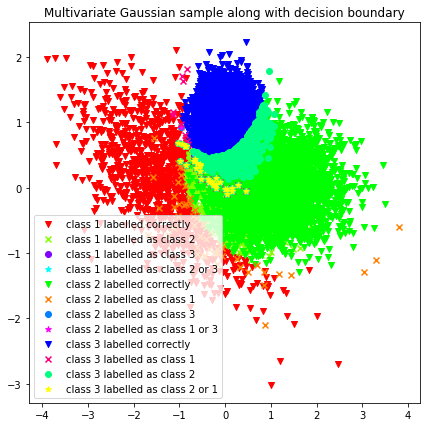

In [205]:
plt.figure(figsize=(7, 7))

marker = ['v','x','o','*']
label1 = ['class 1 labelled correctly','class 1 labelled as class 2','class 1 labelled as class 3','class 1 labelled as class 2 or 3']
label2 = ['class 2 labelled correctly','class 2 labelled as class 1','class 2 labelled as class 3','class 2 labelled as class 1 or 3']
label3 = ['class 3 labelled correctly','class 3 labelled as class 1','class 3 labelled as class 2','class 3 labelled as class 2 or 1']
    
length1 = generatePlot_misclassificationClass(c12,c13,x1,[(1,0,0),(0.5,1,0),(0.5,0,1),(0,1,1)],[1,2,3],label1,marker)
length2 = generatePlot_misclassificationClass(c21,c23,x2,[(0,1,0),(1,0.5,0),(0,0.5,1),(1,0,1)],[2,1,3],label2,marker)
length3 = generatePlot_misclassificationClass(c31,c32,x3,[(0,0,1),(1,0,0.5),(0,1,0.5),(1,1,0)],[2,3,1],label3,marker)
plt.title('Multivariate Gaussian sample along with decision boundary')
plt.show()


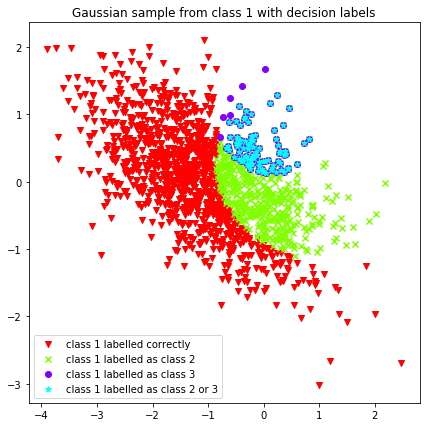

In [206]:
plt.figure(figsize=(7, 7))
length1 = generatePlot_misclassificationClass(c12,c13,x1,[(1,0,0),(.5,1,0),(.5,0,1),(0,1,1)],[1,2,3],label1,marker)
plt.title('Gaussian sample from class 1 with decision labels')
plt.show()


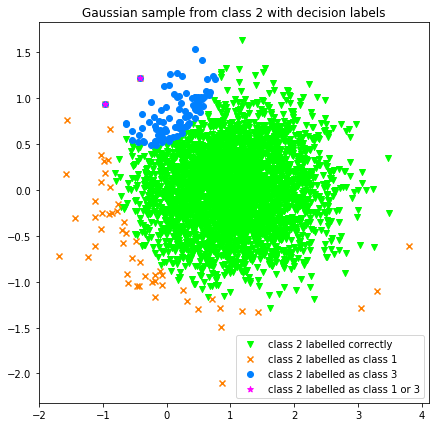

In [207]:
plt.figure(figsize=(7, 7))
length2 = generatePlot_misclassificationClass(c21,c23,x2,[(0,1,0),(1,.5,0),(0,.5,1),(1,0,1)],[2,1,3],label2,marker)
plt.title('Gaussian sample from class 2 with decision labels')
plt.show()


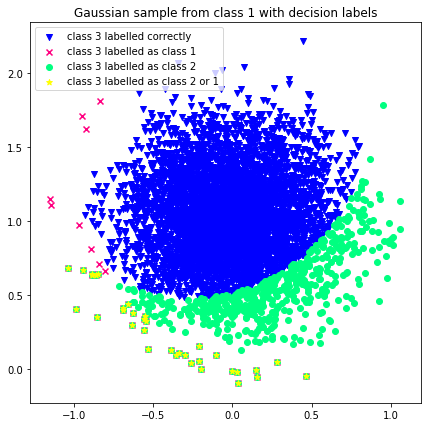

In [208]:
plt.figure(figsize=(7, 7))
length3 = generatePlot_misclassificationClass(c31,c32,x3,[(0,0,1),(1,0,.5),(0,1,.5),(1,1,0)],[2,3,1],label3,marker)
plt.title('Gaussian sample from class 1 with decision labels')
plt.show()


In [209]:
confusionMat = [length1,length2,length3]


In [210]:
col_labels = ['Confusion Matrix','True label_1','True label_2','True label_3']
row_labels = [['Predicted label_1', 'Predicted label_2','Predicted label_3',
               'Overlap of misclassified predicted classes','Total']]

val = row_labels + confusionMat

fig = go.Figure(data=[go.Table( columnorder = [0,1,2,3],columnwidth = [25,7,7,7],
                                header=dict(values=col_labels,font=dict(size=14),height=40),
                                cells=dict(values=val,align=['center', 'center'],
                                font_size=14,height=40))])

fig.show()